In [2]:
import os
os.chdir("C:\\Users\\cktna\\Downloads\\bigcon-2020-master\\bigcon-2020-master")

In [4]:
from modeling.booster import CatBoost, LightGBM
from modeling.utils import *
from modeling.metrics import *
import pandas as pd

In [5]:
lgbm_null_params = {"learning_rate":0.08857, "max_bin": 27, "max_depth":6, "min_data_in_leaf":28, "num_leaves":36,"num_boost_round":100}

In [13]:
lgb_model, null_pred = LightGBM().make_result(lgbm_null_params, 1000)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 35379, number of used features: 85
[LightGBM] [Info] Start training from score 16.551243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [12]:
cat_normal_params = dict(depth=8, 
    l2_leaf_reg = 3.077,
    learning_rate = 0.1064,
    min_data_in_leaf= 14,
                        iterations=140)

In [30]:
cat_model, normal_pred = CatBoost().make_result(cat_normal_params, 80)

In [15]:
import shap 
from catboost import Pool
from matplotlib.font_manager import fontManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font='Malgun Gothic',
       rc ={'axes.unicode_minus':False},
       style='whitegrid')

In [67]:
import lightgbm as lgb

In [ ]:
lgb.train()

In [38]:
data = get_data("data.csv")
data = data.rename(columns={"월":"month"})

cat_vars = ['마더코드', '상품코드', '상품명', '상품군', '공휴일여부', '브랜드', 'NS상품군_대', 'NS상품군_중', 'NS상품군_소', 'prodnames', '성별',
                    '결제방법', '세트여부', 'cluster', '일', '시간', '분', '요일', '계절', ]


data[cat_vars] = data[cat_vars].fillna("NA").astype(str).astype(dict(zip(cat_vars, ["category" for _ in cat_vars])))


train = data.loc[lambda x:x.로그_취급액.isna() == False]
test = data.loc[data['로그_취급액'].isna()]
normal = test.loc[lambda x:x.상품명.isin(train.상품명)]
null = test.loc[lambda x: ~x.상품명.isin(train.상품명)]


In [39]:
data.shape, test.shape, normal.shape, null.shape

((38095, 87), (2716, 87), (453, 87), (2263, 87))

In [41]:
normal_shap_values = cat_model.get_feature_importance(Pool(train, label=train["로그_취급액"], cat_features = cat_vars), type="ShapValues")

expected_values = normal_shap_values[0, -1]
shap_values = normal_shap_values[:,:-1]

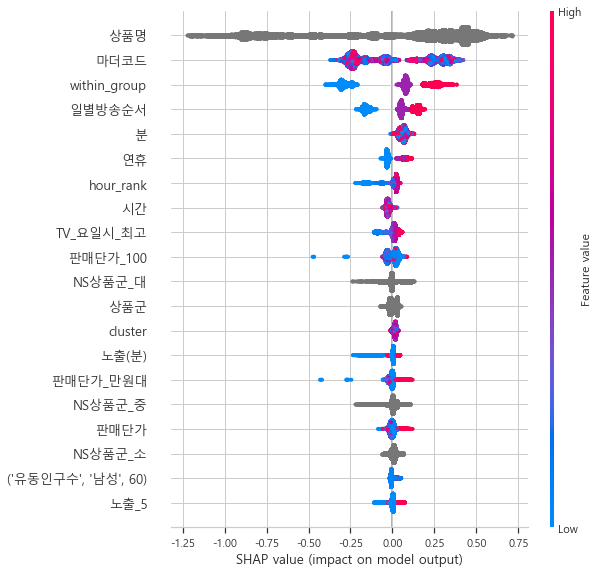

In [43]:
normal_shap_plot = shap.summary_plot(shap_values, train)

In [57]:
from sklearn.preprocessing import LabelEncoder

data = data.assign(**{feature: LabelEncoder().fit_transform(data[feature].astype(str)) for feature in cat_vars})
train = data.loc[lambda x:x.로그_취급액.isna() == False]
test = data.loc[data['로그_취급액'].isna()]
normal = test.loc[lambda x:x.상품명.isin(train.상품명)].drop(columns = ["로그_취급액"])
null = test.loc[lambda x: ~x.상품명.isin(train.상품명)].drop(columns= ["로그_취급액"])


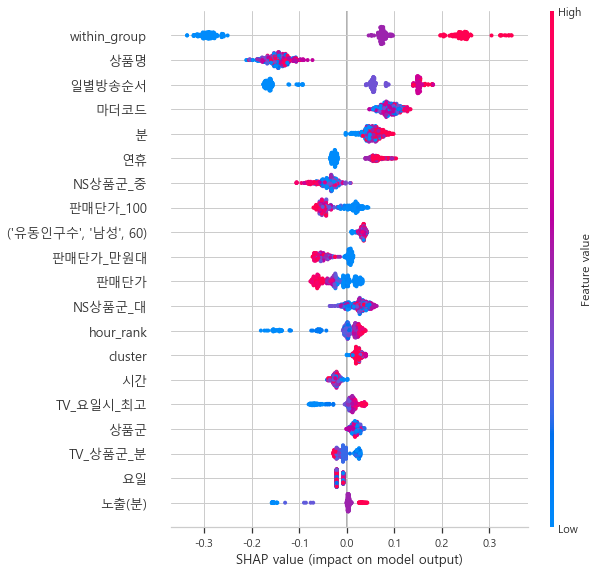

In [69]:
normal_shap_values = shap.TreeExplainer(cat_model).shap_values(normal)
normal_shap_plot = shap.summary_plot(normal_shap_values, normal)

In [72]:
explainer = shap.TreeExplainer(lgb_model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: [16.55124274]


In [73]:
select = range(20)
features = null.iloc[select]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    s

KeyError: 'objective'

In [66]:
null_shap_values.shap_values(train.drop(columns=["로그_취급액"]))

KeyError: 'objective'